In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import make_scorer, roc_auc_score, recall_score, accuracy_score
from sklearn import decomposition, datasets
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures


Bad key text.latex.unicode in file C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to 

In [2]:
df = pd.read_csv("../Proyecto3/dfequilibrado40.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [4]:
df.shape

(80000, 23)

In [5]:
df.dtypes

Unnamed: 0                 int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
Unnamed: 21              float64
dtype: object

In [6]:
df.isnull().sum()

Unnamed: 0                   0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                     0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                     0
DEP_DEL15                    0
DEP_TIME_BLK                 0
ARR_TIME                     0
ARR_DEL15                    0
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
Unnamed: 21              80000
dtype: int64

In [7]:
# Data con tails (sin la N del principio, fabricante, modelo y cantidad de asientos
data = pd.read_csv('../Proyecto3/new_data.csv')
data.sample()

,N-NUMBER,MFR,MODEL,NO-SEATS
18406,347AV,HULL JAMES S,AVID FLYER HVY HLR,2.0


In [8]:
# Me fijo en df si todos tails tienen el mismo formato
df.TAIL_NUM.str.startswith('N').value_counts()

True     78841
False     1159
Name: TAIL_NUM, dtype: int64

In [9]:
# Modifico la columna  TAIL_NUM sacándole la primer N para que sea compatible con data y joinear
df['TAIL_NUM'] = np.where(df.TAIL_NUM.str.len() == 6, df.TAIL_NUM.str[1:], df.TAIL_NUM)
df['TAIL_NUM'].sample(5)

22321    242NV
53111    926VA
72064    293AK
25655    838SK
48930    239WN
Name: TAIL_NUM, dtype: object

In [10]:
# Miramos como quedo TAIL_NUM y vemos que lo que no tienen len=5 son los nulos
print('cantidad de TAIL_NUM nulos: ', df['TAIL_NUM'].isnull().sum())
mask = df['TAIL_NUM'].str.len() == 5
mask.value_counts()

cantidad de TAIL_NUM nulos:  0


True    80000
Name: TAIL_NUM, dtype: int64

In [11]:
# Los dropeamos
df.dropna(subset=['TAIL_NUM'], inplace=True)

In [12]:
# Hacemos Join con data 
df = df.set_index('TAIL_NUM').join(data.set_index('N-NUMBER')).reset_index()
df.head()

,index,Unnamed: 0,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,...,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,MFR,MODEL,NO-SEATS
0,101DU,71167,23,4,DL,19790,DL,1766,14869,1486903,...,1700-1759,2026.0,0.0,0.0,0.0,989.0,NaN,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,133.0
1,101DU,40267,4,6,DL,19790,DL,522,14771,1477104,...,1300-1359,1620.0,0.0,0.0,0.0,599.0,NaN,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,133.0
2,101DU,38366,31,5,DL,19790,DL,308,11298,1129806,...,1500-1559,1759.0,1.0,0.0,0.0,852.0,NaN,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,133.0
3,101DU,62902,17,5,DL,19790,DL,905,11298,1129806,...,0800-0859,1023.0,0.0,0.0,0.0,989.0,NaN,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,133.0
4,101DU,66974,17,5,DL,19790,DL,3057,14869,1486903,...,1100-1159,1223.0,0.0,0.0,0.0,588.0,NaN,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,133.0


In [13]:
df.isnull().sum()

index                        0
Unnamed: 0                   0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                     0
DEP_DEL15                    0
DEP_TIME_BLK                 0
ARR_TIME                     0
ARR_DEL15                    0
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
Unnamed: 21              80000
MFR                        229
MODEL                      229
NO-SEATS                   229
dtype: int64

## Limpieza

### Columnas duplicadas y redundantes

Analizamos OP_UNIQUE_CARRIER, OP_CARRIER y OP_CARRIER_AIRLINE_ID:

In [14]:
#Sampleamos el 50% de los datos porque son muchos
df = df.sample(frac=0.5, random_state=42)

In [15]:
df.shape

(40000, 26)

In [16]:
# son iguales
(df.OP_UNIQUE_CARRIER == df.OP_CARRIER).value_counts()

True    40000
dtype: int64

In [17]:
# hay 1 id por cada carrier 
df.groupby('OP_UNIQUE_CARRIER')['OP_CARRIER_AIRLINE_ID'].nunique().value_counts()

1    17
Name: OP_CARRIER_AIRLINE_ID, dtype: int64

OP_CARRIER, OP_UNIQUE_CARRIER y OP_CARRIER_AIRLINE_ID dan la misma información, nos quedaremos con OP_CARRIER

Analizamos ORIGIN_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID y ORIGIN:

In [18]:
# son iguales con 2 digitos agregados al final
mask = (df.ORIGIN_AIRPORT_ID == df.ORIGIN_AIRPORT_SEQ_ID // 100)
mask.value_counts()

True    40000
dtype: int64

Analizamos DEST_AIRPORT_ID, DEST_AIRPORT_SEQ_ID y DEST:

In [19]:
mask1 = (df.DEST_AIRPORT_ID == df.DEST_AIRPORT_SEQ_ID // 100)
mask1.value_counts()

True    40000
dtype: int64

In [20]:
df.groupby('DEST')['DEST_AIRPORT_SEQ_ID'].nunique().value_counts()

1    340
Name: DEST_AIRPORT_SEQ_ID, dtype: int64

In [21]:
df.head(10)

,index,Unnamed: 0,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,...,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,MFR,MODEL,NO-SEATS
47044,722FR,61235,10,5,F9,20436,F9,1771,11193,1119302,...,1600-1659,1917.0,0.0,0.0,0.0,948.0,NaN,AIRBUS,A321-211,199.0
44295,688DL,64674,2,4,DL,19790,DL,1754,10397,1039707,...,2000-2059,2204.0,0.0,0.0,0.0,581.0,NaN,BOEING,757-232,178.0
74783,947SW,50370,10,5,OO,20304,OO,5657,14698,1469802,...,1100-1159,1236.0,0.0,0.0,0.0,190.0,NaN,BOMBARDIER INC,CL-600-2B19,55.0
70975,924AN,41400,4,6,AA,19805,AA,1326,10423,1042302,...,1000-1059,1133.0,0.0,0.0,0.0,190.0,NaN,BOEING,737-823,162.0
46645,717JL,77409,4,6,DL,19790,DL,1561,13342,1334207,...,1700-1759,1840.0,0.0,0.0,0.0,297.0,NaN,BOEING,717-200,100.0
8215,216FR,56431,5,7,F9,20436,F9,2879,12953,1295304,...,2200-2259,145.0,0.0,0.0,0.0,1096.0,NaN,AIRBUS,A320-214,182.0
65509,892UA,63767,9,4,UA,19977,UA,645,11775,1177502,...,0700-0759,814.0,0.0,0.0,0.0,483.0,NaN,AIRBUS,A319-132,179.0
62715,8655D,19141,6,1,WN,19393,WN,5790,10693,1069302,...,0600-0659,935.0,1.0,0.0,0.0,793.0,NaN,BOEING,737-8H4,140.0
39859,626NK,40094,14,2,NK,20416,NK,631,11433,1143302,...,1700-1759,2032.0,0.0,0.0,0.0,983.0,NaN,AIRBUS,A320-232,200.0
58834,842VA,79258,10,5,AS,19930,AS,1777,12889,1288903,...,1100-1159,1447.0,0.0,0.0,0.0,867.0,NaN,AIRBUS,A320-214,182.0


In [22]:
df['ORIGIN'].value_counts()

ORD    1915
ATL    1859
DFW    1784
CLT    1523
DEN    1275
       ... 
PPG       1
HGR       1
LCK       1
PSM       1
PAH       1
Name: ORIGIN, Length: 344, dtype: int64

In [23]:
#dropear registros que no tienen datos en DEPTIME y DEL TIME 15, ARR TIME, ARR TIME 15 y TAIL NUM
#porque son pocos y si los imputamos no podemos basarnos en medidas ni medianas
df.dropna(subset=['DEP_TIME', 'DEP_DEL15', 'ARR_TIME', 'ARR_DEL15'], inplace=True)

In [24]:
#dropeamos las columnas que repiten info y la de Unnamed
df = df.drop(['OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'Unnamed: 21' ], axis=1)
df.shape

(40000, 19)

In [25]:
df.shape

(40000, 19)

In [26]:
df.columns

Index(['index', 'Unnamed: 0', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME', 'DEP_DEL15',
       'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED',
       'DISTANCE', 'MFR', 'MODEL', 'NO-SEATS'],
      dtype='object')

In [27]:
#renombrar columnas
df.rename(columns={'DAY_OF_MONTH':'dia_mes', 'DAY_OF_WEEK':'dia_semana', 'OP_CARRIER':'aerolinea',
       'OP_CARRIER_FL_NUM':'nro_vuelo', 'ORIGIN':'origen', 'DEST':'destino', 'DEP_TIME':'hora_salida', 'DEP_DEL15':'demora_salida',
       'DEP_TIME_BLK':'hora_salida_blk', 'ARR_TIME':'hora_arribo', 'ARR_DEL15':'demora_arribo', 'CANCELLED':'cancelado', 'DIVERTED':'desviado',
       'DISTANCE':'distancia'}, inplace=True)

In [28]:
df.head()

,index,Unnamed: 0,dia_mes,dia_semana,aerolinea,nro_vuelo,origen,destino,hora_salida,demora_salida,hora_salida_blk,hora_arribo,demora_arribo,cancelado,desviado,distancia,MFR,MODEL,NO-SEATS
47044,722FR,61235,10,5,F9,1771,CVG,MIA,1640.0,0.0,1600-1659,1917.0,0.0,0.0,0.0,948.0,AIRBUS,A321-211,199.0
44295,688DL,64674,2,4,DL,1754,ATL,FLL,2020.0,0.0,2000-2059,2204.0,0.0,0.0,0.0,581.0,BOEING,757-232,178.0
74783,947SW,50370,10,5,OO,5657,SBP,SFO,1139.0,0.0,1100-1159,1236.0,0.0,0.0,0.0,190.0,BOMBARDIER INC,CL-600-2B19,55.0
70975,924AN,41400,4,6,AA,1326,AUS,DFW,1029.0,0.0,1000-1059,1133.0,0.0,0.0,0.0,190.0,BOEING,737-823,162.0
46645,717JL,77409,4,6,DL,1561,MKE,MSP,1724.0,0.0,1700-1759,1840.0,0.0,0.0,0.0,297.0,BOEING,717-200,100.0


In [29]:
df = df.drop(['nro_vuelo' ], axis=1) #dropeamos nro de vuelo porque es info redundante. Esta en origen, destino y horario

In [30]:
#dropeamos las columnas que tienen info redundante con respecto al target demora_arribo
df.drop(['cancelado'], axis=1, inplace=True)
df.drop(['desviado'], axis=1, inplace=True)
df.drop(['demora_salida'], axis=1, inplace=True)
#df.drop(['hora_salida_blk'], axis=1, inplace=True)

Nuestra y va a ser demora_arribo (Si se demoro 15 min si o no (1 o 0))

In [32]:
from sklearn.model_selection import train_test_split

# Separamos las variables independientes de la target
X=df.drop(columns=['demora_arribo'])
y=df['demora_arribo']

# Dividimos los datos en el set de train, validación y el de test: 

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))
display(X_train.shape, x_val.shape, X_test.shape,  y_test.shape, y_val.shape, y_train.shape)

(30000, 14)

(6000, 14)

(4000, 14)

(4000,)

(6000,)

(30000,)

In [33]:
y_train.value_counts()

1.0    15127
0.0    14873
Name: demora_arribo, dtype: int64

In [34]:
y_train.mean(), y_test.mean()

(0.5042333333333333, 0.4885)

Difereciar features numericas de categoricas

In [35]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self,selected_features):
        self.selected_features=selected_features

    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [36]:
df.dtypes

index               object
Unnamed: 0           int64
dia_mes              int64
dia_semana           int64
aerolinea           object
origen              object
destino             object
hora_salida        float64
hora_salida_blk     object
hora_arribo        float64
demora_arribo      float64
distancia          float64
MFR                 object
MODEL               object
NO-SEATS           float64
dtype: object

In [37]:
df.head()

,index,Unnamed: 0,dia_mes,dia_semana,aerolinea,origen,destino,hora_salida,hora_salida_blk,hora_arribo,demora_arribo,distancia,MFR,MODEL,NO-SEATS
47044,722FR,61235,10,5,F9,CVG,MIA,1640.0,1600-1659,1917.0,0.0,948.0,AIRBUS,A321-211,199.0
44295,688DL,64674,2,4,DL,ATL,FLL,2020.0,2000-2059,2204.0,0.0,581.0,BOEING,757-232,178.0
74783,947SW,50370,10,5,OO,SBP,SFO,1139.0,1100-1159,1236.0,0.0,190.0,BOMBARDIER INC,CL-600-2B19,55.0
70975,924AN,41400,4,6,AA,AUS,DFW,1029.0,1000-1059,1133.0,0.0,190.0,BOEING,737-823,162.0
46645,717JL,77409,4,6,DL,MKE,MSP,1724.0,1700-1759,1840.0,0.0,297.0,BOEING,717-200,100.0


In [38]:
df.shape

(40000, 15)

In [39]:
#seleccionamos features numericas
selector_numericas=FeatureSelection(selected_features=['hora_salida', 'hora_arribo', 'distancia'])

In [40]:
#seleccionamos features categoricas
selector_categoricas=FeatureSelection(selected_features=['dia_semana', 'dia_mes', 'aerolinea', 'origen','destino', 'hora_salida_blk'])

In [41]:
pasos_numericas = [('selector',selector_numericas), ('scaler', StandardScaler())]

In [42]:
pasos_categoricas = [('selector',selector_categoricas), ('encoder', OneHotEncoder(handle_unknown = "ignore"))]

In [43]:
pipe_num = Pipeline(pasos_numericas)

In [44]:
pipe_cat = Pipeline(pasos_categoricas)

In [45]:
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [46]:
pasos = [ ('feature_engineering',FeatureUnion([ ('num', pipe_num), ('cat', pipe_cat) ]) ), 
         ('poly', PolynomialFeatures()),
         ('clasificador', None)]

In [47]:
pipe=Pipeline(pasos)

### Probamos KNN

In [48]:
param_grid_knn= [{'clasificador__n_neighbors':range(6,20,1), 'clasificador__weights':['uniform','distance'], 
                  'clasificador__metric': ['minkowski', 'manhattan', 'euclidean'],
     'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador': [KNeighborsClassifier()]}]


In [49]:
grid_knn=RandomizedSearchCV(pipe, param_grid_knn, n_jobs=-1, cv=folds, scoring='accuracy')

In [50]:
grid_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['hora_salida',
                                                                                                                                   'hora_arribo',
                                                                                                                                   'distancia'])),
                                                                                              ('scaler',
                                                                                               StandardScaler())]

In [51]:
grid_knn.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['hora_salida',
                                                                                                      'hora_arribo',
                                                                                                      'distancia'])),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['dia_semana',
                                                            

In [52]:
grid_knn.best_score_

0.6798333333333334

In [53]:
grid_knn.best_params_

{'feature_engineering__num__scaler': StandardScaler(),
 'clasificador__weights': 'distance',
 'clasificador__n_neighbors': 11,
 'clasificador__metric': 'manhattan',
 'clasificador': KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')}

### Probamos Regresión Logística

In [54]:
param_grid_logistic= [
    {'clasificador__penalty': ['l1', 'l2'], 'clasificador__C': np.arange(0.01,100, 0.02),
     'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador': [LogisticRegression(solver='liblinear', max_iter=3500)]}
]

In [55]:
grid_logistic=RandomizedSearchCV(pipe, param_grid_logistic, n_jobs=-1, cv=folds, scoring='accuracy')

In [56]:
grid_logistic.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['hora_salida',
                                                                                                                                   'hora_arribo',
                                                                                                                                   'distancia'])),
                                                                                              ('scaler',
                                                                                               StandardScaler())]

In [57]:
grid_logistic.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['hora_salida',
                                                                                                      'hora_arribo',
                                                                                                      'distancia'])),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['dia_semana',
                                                            

In [58]:
grid_logistic.best_score_

0.7949666666666666

In [59]:
grid_logistic.best_params_

{'feature_engineering__num__scaler': StandardScaler(),
 'clasificador__penalty': 'l1',
 'clasificador__C': 6.249999999999999,
 'clasificador': LogisticRegression(C=6.249999999999999, max_iter=3500, penalty='l1',
                    solver='liblinear')}

### Probamos Bayes Mutinomial

In [60]:
param_grid_bayes=  [{ 'clasificador__alpha': np.arange(0.2, 5, 0.02),
    'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador': [MultinomialNB()] }]

In [61]:
grid_bayes=RandomizedSearchCV(pipe, param_grid_bayes, n_jobs=-1, cv=folds, scoring='accuracy')

In [62]:
grid_bayes.fit(X_train, y_train)

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\Users\krist_21mtz37\anaconda3\envs\dh

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['hora_salida',
                                                                                                                                   'hora_arribo',
                                                                                                                                   'distancia'])),
                                                                                              ('scaler',
                                                                                               StandardScaler())]

In [63]:
grid_bayes.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['hora_salida',
                                                                                                      'hora_arribo',
                                                                                                      'distancia'])),
                                                                 ('scaler',
                                                                  MinMaxScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['dia_semana',
                                                              

In [64]:
grid_bayes.best_score_

0.6278333333333334

### Probamos Bayes Bernoulli

In [65]:
param_grid_bayesB= [{ 'clasificador__alpha': np.arange(0.38, 5, 0.05),
    'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador': [BernoulliNB()] }]

In [66]:
grid_bernoulli=RandomizedSearchCV(pipe, param_grid_bayesB, n_jobs=-1, cv=folds, scoring='accuracy')

In [67]:
grid_bernoulli.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['hora_salida',
                                                                                                                                   'hora_arribo',
                                                                                                                                   'distancia'])),
                                                                                              ('scaler',
                                                                                               StandardScaler())]

In [68]:
grid_bernoulli.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['hora_salida',
                                                                                                      'hora_arribo',
                                                                                                      'distancia'])),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['dia_semana',
                                                            

In [69]:
grid_bernoulli.best_score_

0.6371666666666667

### Probamos SGDC

In [70]:
param_grid_SGDC= [
    {'clasificador__penalty':['l1', 'l2'], 'clasificador__alpha': np.arange(0.0001,0.2,0.0001),
     'clasificador__loss': ['log', 'modified_huber', 'hinge', 'perceptron'],
     'clasificador__epsilon': np.arange(0.01, 0.3, 0.1),
        'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador': [SGDClassifier(max_iter=2000)]} 
    ]

In [71]:
param_grid_SGDC=RandomizedSearchCV(pipe, param_grid_SGDC, n_jobs=-1, cv=folds, scoring='accuracy')

In [72]:
param_grid_SGDC.fit(X_train, y_train)
param_grid_SGDC.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['hora_salida',
                                                                                                      'hora_arribo',
                                                                                                      'distancia'])),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['dia_semana',
                                                            

In [73]:
param_grid_SGDC.best_score_

0.7294666666666667

## Testeamos la performance de Logistic Regression

In [74]:
#Veamos cuánto da el clasificador nulo
y_test.value_counts(normalize=True)
y_test.mean()
1.0 - y_test.mean()

0.5115000000000001

In [75]:
grid_logistic.best_score_

0.7949666666666666

In [76]:
y_pred_logistic = grid_logistic.predict(x_val)
confusion_logistic = confusion_matrix(y_val, y_pred_logistic)
confusion_logistic 

array([[2429,  532],
       [ 591, 2448]], dtype=int64)

In [77]:
print('Accuracy=', accuracy_score(y_val, y_pred_logistic))

Accuracy= 0.8128333333333333


In [78]:
print(recall_score(y_val, y_pred_logistic)) 


0.805528134254689


In [79]:
print(precision_score(y_val, y_pred_logistic)) 

0.8214765100671141


In [80]:
print(f1_score(y_val,y_pred_logistic))

0.8134241568366838


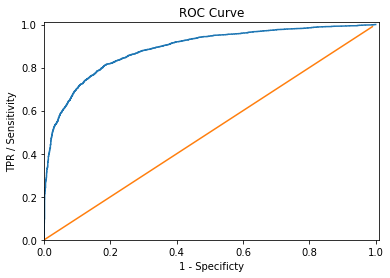

In [81]:
# ROC Curve y AUC
y_pred_logistic_proba = grid_logistic.predict_proba(x_val)

from sklearn.metrics import roc_curve
fpr_lg,tpr_lg,thr_lg = roc_curve(y_val, y_pred_logistic_proba[:,1])

df_lg = pd.DataFrame(dict(fpr=fpr_lg, tpr=tpr_lg, thr = thr_lg))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [82]:
print('AUC=', auc(fpr_lg, tpr_lg))

AUC= 0.8888879998497523


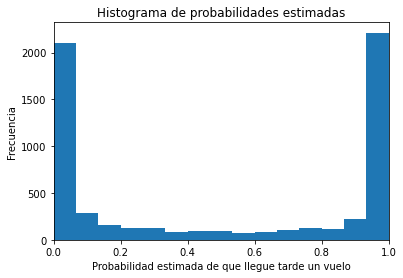

In [83]:
#Ahora vamos a visualizar la distribución de demoras con respecto al umbral 0.5
y_pred_proba = grid_logistic.predict_proba(x_val)
y_probs_logit_left = y_pred_proba[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_left, bins=15)
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de que llegue tarde un vuelo')
plt.ylabel('Frecuencia')
plt.show()

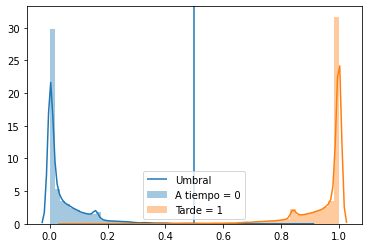

In [84]:
sns.distplot(grid_logistic.predict_proba(X_train[y_train==0])[:,1])
sns.distplot(grid_logistic.predict_proba(X_train[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'A tiempo = 0', 'Tarde = 1'])

In [85]:
#movemos el umbral de 0.5 a 0.4
from sklearn.preprocessing import binarize
y_pred_logistic_new = binarize(y_pred_proba, 0.45)[:,1]
y_pred_logistic_new = (y_probs_logit_left > 0.45).astype(int)
y_pred_logistic_new

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.45 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([0, 0, 1, ..., 1, 1, 0])

In [86]:
#comparamos las matrices de confusion de la Regresion logistica original y la que tiene el umbral en 0.4 
#aunque no es tan necesario aumentar la sensibilidad
print('Matrix Original')
display(confusion_matrix(y_val,y_pred_logistic))
print('')
print('Nueva Matrix')
display(confusion_matrix(y_val,y_pred_logistic_new))

Matrix Original


array([[2429,  532],
       [ 591, 2448]], dtype=int64)


Nueva Matrix


array([[2387,  574],
       [ 555, 2484]], dtype=int64)

In [87]:
print('Recall umbral 0.5=', recall_score(y_val, y_pred_logistic))
print('Recall umbral 0.45=', recall_score(y_val, y_pred_logistic_new))

Recall umbral 0.5= 0.805528134254689
Recall umbral 0.45= 0.8173741362290227


In [88]:
print(precision_score(y_val, y_pred_logistic_new)) #con un umbral de 0.35 baja el precision score pero sube mucho el recall

0.8122956180510137


In [89]:
print('Accuracy=', accuracy_score(y_val, y_pred_logistic_new))

Accuracy= 0.8118333333333333


## Testeamos la performance de SGDC

In [90]:
param_grid_SGDC.best_score_

0.7294666666666667

In [91]:
y_pred_SGDC = param_grid_SGDC.predict(x_val)
confusion_SGDC = confusion_matrix(y_val, y_pred_SGDC)
confusion_SGDC

array([[1885, 1076],
       [ 550, 2489]], dtype=int64)

In [92]:
print('Accuracy=', accuracy_score(y_val, y_pred_SGDC))

Accuracy= 0.729


## Testear performance de KNN

In [94]:
grid_knn.best_score_

0.6798333333333334

In [95]:
y_pred_knn = grid_knn.predict(x_val)
confusion_knn = confusion_matrix(y_val, y_pred_knn)
confusion_knn

array([[2021,  940],
       [1014, 2025]], dtype=int64)

In [96]:
print(recall_score(y_val, y_pred_knn)) 

0.6663376110562685


In [97]:
print(precision_score(y_val, y_pred_knn)) 

0.6829679595278246


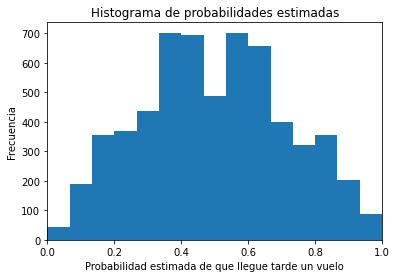

In [98]:
y_pred_knn_proba = grid_knn.predict_proba(x_val)

y_probs_knn_left = y_pred_knn_proba[:,1]

plt.hist(y_probs_knn_left, bins=15)
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de que llegue tarde un vuelo')
plt.ylabel('Frecuencia')
plt.legend(['KNN','Logistic'])
plt.show()

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


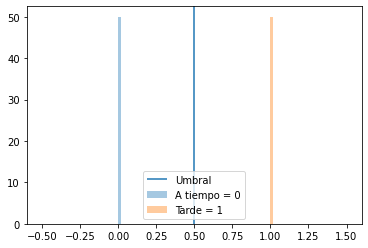

In [99]:
sns.distplot(grid_knn.predict_proba(X_train[y_train==0])[:,1])
sns.distplot(grid_knn.predict_proba(X_train[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'A tiempo = 0', 'Tarde = 1'])

In [100]:
#movemos el umbral de 0.5 a 0.4
y_pred_knn_new = binarize(y_pred_knn_proba, 0.4)[:,1]
y_pred_knn_new = (y_probs_knn_left > 0.4).astype(int)
y_pred_knn_new

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([0, 1, 1, ..., 1, 0, 0])

In [101]:
#comparamos las matrices de confusion de KNN original y el que tiene el umbral en 0.4
print('Matrix Original')
display(confusion_matrix(y_val,y_pred_knn))
print('')
print('Nueva Matrix')
display(confusion_matrix(y_val,y_pred_knn_new))

Matrix Original


array([[2021,  940],
       [1014, 2025]], dtype=int64)


Nueva Matrix


array([[1472, 1489],
       [ 623, 2416]], dtype=int64)

In [102]:
print('Recall umbral 0.5=', recall_score(y_val, y_pred_knn))
print('Recall umbral 0.4=', recall_score(y_val, y_pred_knn_new))

Recall umbral 0.5= 0.6663376110562685
Recall umbral 0.4= 0.794998354721948


In [103]:
print(precision_score(y_val, y_pred_knn))
print(precision_score(y_val, y_pred_knn_new))

0.6829679595278246
0.6186939820742637


In [104]:
print(accuracy_score(y_val, y_pred_knn))
print(accuracy_score(y_val, y_pred_knn_new))

0.6743333333333333
0.648


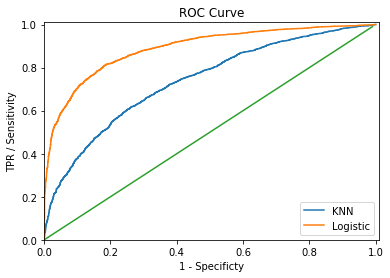

In [106]:
fpr_knn,tpr_knn,thr_knn = roc_curve(y_val, y_pred_knn_proba[:,1])
fpr_lg,tpr_lg,thr_lg = roc_curve(y_val, y_pred_logistic_proba[:,1])
#fpr_sg,tpr_sg,thr_sg = roc_curve(y_val, y_pred_SGDC_proba[:,1])

df_knn= pd.DataFrame(dict(fpr=fpr_knn, tpr=tpr_knn, thr = thr_knn))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_knn,tpr_knn)
plt.plot(fpr_lg,tpr_lg)
#plt.plot(fpr_sg,tpr_sg)
plt.legend(['KNN','Logistic'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

## Testeamos la performance de MultinomialNB

In [107]:
grid_bayes.best_score_

0.6278333333333334

In [108]:
y_pred_multi = grid_bayes.predict(x_val)
confusion_multi = confusion_matrix(y_val, y_pred_multi)
confusion_multi

array([[1713, 1248],
       [1031, 2008]], dtype=int64)

In [109]:
print(recall_score(y_val, y_pred_multi)) 

0.6607436656794998


In [110]:
print(precision_score(y_val, y_pred_multi)) 

0.6167076167076168


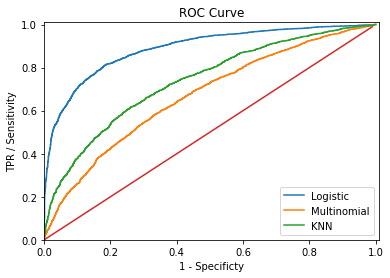

In [130]:
y_pred_multi_proba = grid_bayes.predict_proba(x_val)

fpr_mu,tpr_mu,thr_mu = roc_curve(y_val, y_pred_multi_proba[:,1])

df_mu = pd.DataFrame(dict(fpr=fpr_mu, tpr=tpr_mu, thr = thr_mu))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_lg,tpr_lg)
plt.plot(fpr_mu,tpr_mu)
plt.plot(fpr_knn,tpr_knn)
#plt.plot(fpr_sg,tpr_sg)
plt.legend(['Logistic', 'Multinomial', 'KNN'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

## Testeamos performance de BayesBernoulli

In [114]:
grid_bernoulli.best_score_

0.6371666666666667

In [115]:
y_test.value_counts(normalize=True)
y_test.mean()
1.0 - y_test.mean()

0.5115000000000001

In [116]:
y_pred_berno = grid_bayes.predict(x_val)
confusion_berno= confusion_matrix(y_val, y_pred_berno)
confusion_berno

array([[1713, 1248],
       [1031, 2008]], dtype=int64)

In [117]:
print(recall_score(y_val, y_pred_berno)) 

0.6607436656794998


In [118]:
print(precision_score(y_val, y_pred_berno)) 

0.6167076167076168


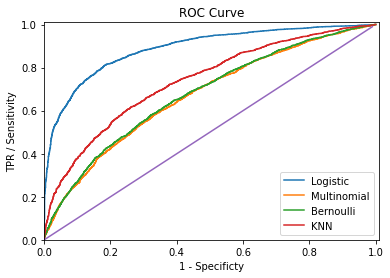

In [132]:
y_pred_berno_proba = grid_bernoulli.predict_proba(x_val)

fpr_b,tpr_b,thr_b = roc_curve(y_val, y_pred_berno_proba[:,1])

df_b = pd.DataFrame(dict(fpr=fpr_b, tpr=tpr_b, thr = thr_b))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
#plt.plot(fpr_knn,tpr_knn)
plt.plot(fpr_lg,tpr_lg)
plt.plot(fpr_mu,tpr_mu)
plt.plot(fpr_b,tpr_b)
plt.plot(fpr_knn,tpr_knn)
#plt.plot(fpr_sg,tpr_sg)
plt.legend(['Logistic', 'Multinomial', 'Bernoulli', 'KNN', 'SGDC'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [120]:
#Visualización de predicciones de regresión logística
y_predL = grid_logistic.predict(X_train)

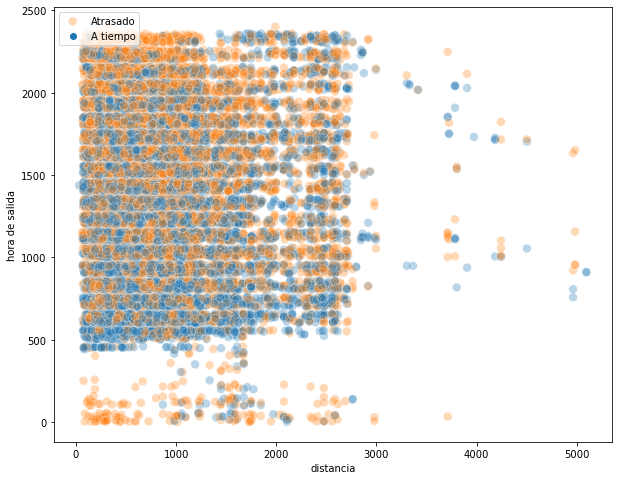

In [121]:
plt.figure(figsize=(10,8))


sns.scatterplot(x=X_train['distancia'], y=X_train['hora_salida'], hue=y_predL , alpha=0.3, s=75)
plt.legend(['Atrasado', 'A tiempo'], loc='upper left')
plt.xlabel('distancia')
plt.ylabel('hora de salida');


In [122]:
#Visualización de datos de entrenamiento de regresión logística
y2 = y_train

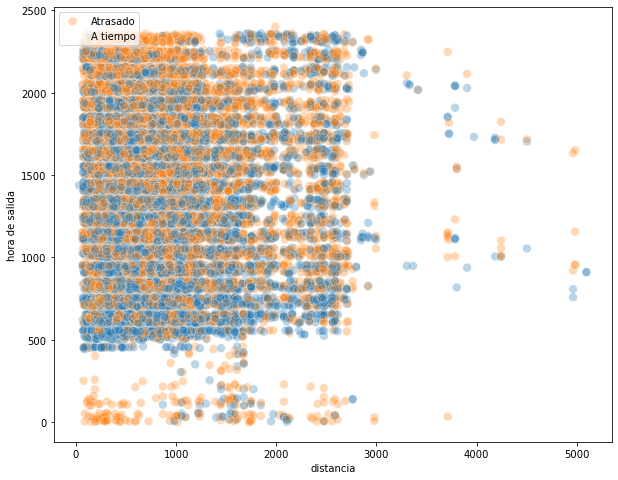

In [123]:
plt.figure(figsize=(10,8))


sns.scatterplot(x=X_train['distancia'], y=X_train['hora_salida'], hue=y2, alpha=0.3, s=75)
plt.legend(['Atrasado', 'A tiempo'], loc='upper left')
plt.xlabel('distancia')
plt.ylabel('hora de salida');


In [125]:
#comparamos el score del mejor modelo (Regresión Logística)
y_pred_logistic_test = grid_logistic.predict(X_test)
print('Accuracy=', accuracy_score(y_test, y_pred_logistic_test))

Accuracy= 0.80525


In [126]:
#score de validación
print('Accuracy=', accuracy_score(y_val, y_pred_logistic))

Accuracy= 0.8128333333333333
